In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load in data
data = pd.read_csv('./vmCloud_data.csv')
print(data.head())

                                  vm_id            timestamp  cpu_usage  \
0  c5215826-6237-4a33-9312-72c1df909881  2023-01-25 09:10:54  54.881350   
1  29690bc6-1f34-403b-b509-a1ecb1834fb8  2023-01-26 04:46:34  71.518937   
2  2e55abc3-5bad-46cb-b445-a577f5e9bf2a  2023-01-13 23:39:47        NaN   
3  e672e32f-c134-4fbc-992b-34eb63bef6bf  2023-02-09 11:45:49  54.488318   
4  f38b8b50-6926-4533-be4f-89ad11624071  2023-06-14 08:27:26  42.365480   

   memory_usage  network_traffic  power_consumption  \
0     78.950861       164.775973         287.808986   
1     29.901883              NaN         362.273569   
2     92.709195       203.674847         231.467903   
3     88.100960              NaN         195.639954   
4           NaN              NaN         359.451537   

   num_executed_instructions  execution_time  energy_efficiency task_type  \
0                     7527.0       69.345575           0.553589   network   
1                     5348.0       41.396040           0.349856 

In [163]:
data.columns

Index(['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic',
       'power_consumption', 'num_executed_instructions', 'execution_time',
       'energy_efficiency', 'task_type', 'task_priority', 'task_status'],
      dtype='object')

In [ ]:
# Remove rows with missing values
data.dropna(inplace=True)

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in ['task_type', 'task_status', 'task_priority']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store for later decoding

In [179]:
data_transformed = data.copy()
data_transformed.head()

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:54,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,2,2,2
6,5651505d-14a2-41d6-989b-eec0aac9b922,2023-06-15 18:04:04,43.758721,22.456429,429.139640,272.960417,9008.0,60.153904,0.461246,0,0,0
9,7fd9a664-1da8-4ae9-8a04-3c341d32d35c,2023-07-10 11:32:51,38.344152,16.441881,779.791345,382.756696,2989.0,42.160847,0.139187,1,2,1
10,ea8455b0-251c-4470-b7ea-8d40476e3434,2023-01-14 19:59:41,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,0,2,0
12,0ddae1eb-86c9-4448-b1b8-e7be96875ad8,2023-04-11 22:45:15,56.804456,2.355626,722.552146,143.340399,9788.0,79.700756,0.944387,1,2,2


In [ ]:
# Scale the data
columns_to_normalize = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency']

scaler = StandardScaler()
data_transformed[columns_to_normalize] = scaler.fit_transform(data_transformed[columns_to_normalize])

In [ ]:
# Check to make sure no more missing values
data_transformed.isnull().sum()

vm_id                        0
timestamp                    0
cpu_usage                    0
memory_usage                 0
network_traffic              0
power_consumption            0
num_executed_instructions    0
execution_time               0
energy_efficiency            0
task_type                    0
task_priority                0
task_status                  0
dtype: int64

In [ ]:
features = ["cpu_usage", "memory_usage", "network_traffic", "execution_time", "power_consumption", "energy_efficiency", 'task_type', 'task_status', 'task_priority']
df_anomaly = data_transformed[features]

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data["anomaly"] = iso_forest.fit_predict(df_anomaly)

In [ ]:
df_anomalies = data[data["anomaly"] == -1]
df_normal = data[data["anomaly"] == 1]

5651

In [ ]:
print(df_normal.describe())

           cpu_usage   memory_usage  network_traffic  power_consumption  \
count  559388.000000  559388.000000    559388.000000      559388.000000   
mean       50.035271      49.972320       500.753009         250.448435   
std        28.735411      28.721407       287.347256         143.765284   
min         0.000133       0.000210         0.000189           0.000699   
25%        25.201344      25.171485       252.489019         126.147318   
50%        50.029294      49.922005       500.846895         250.712637   
75%        74.922832      74.767558       748.960914         374.892819   
max        99.999529      99.999928       999.998687         499.999065   

       num_executed_instructions  execution_time  energy_efficiency  \
count              559388.000000   559388.000000       5.593880e+05   
mean                 5003.466285       49.963285       5.006387e-01   
std                  2885.449042       28.744057       2.874215e-01   
min                     0.000000        

In [ ]:
print(df_anomalies.describe())

         cpu_usage  memory_usage  network_traffic  power_consumption  \
count  5651.000000   5651.000000      5651.000000        5651.000000   
mean     45.491417     52.361625       422.596415         218.472230   
std      39.642804     38.684413       395.017098         204.371072   
min       0.002249      0.005092         0.006386           0.000192   
25%       5.528630     10.215522        51.585472          24.264955   
50%      34.332794     62.077286       232.142578         110.790695   
75%      89.904180     91.434362       886.334237         461.350984   
max      99.998985     99.999414       999.997318         499.995050   

       num_executed_instructions  execution_time  energy_efficiency  \
count                5651.000000     5651.000000        5651.000000   
mean                 5003.339586       54.360023           0.482228   
std                  2879.717815       38.916978           0.379972   
min                     7.000000        0.007643           0.000007

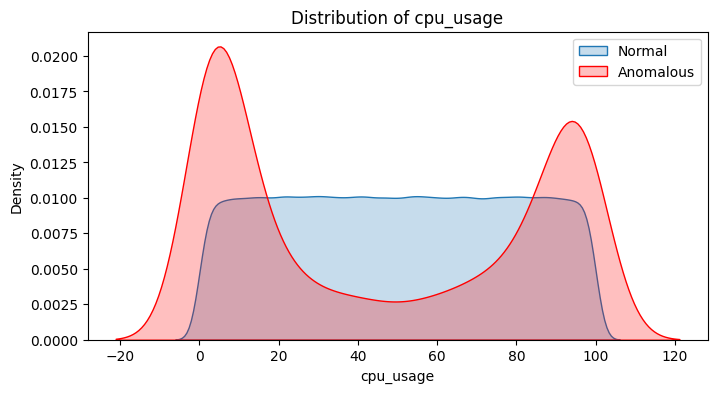

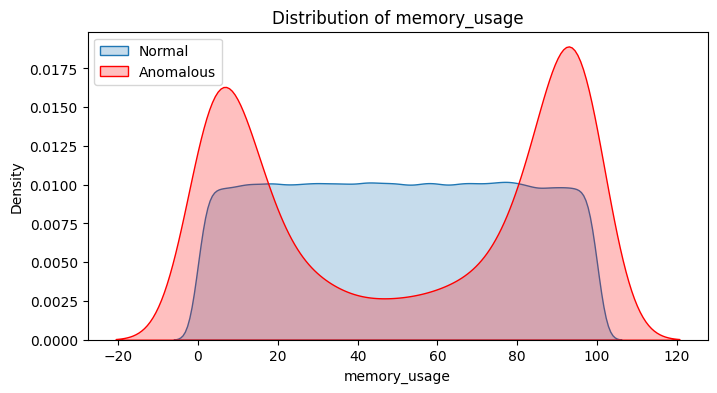

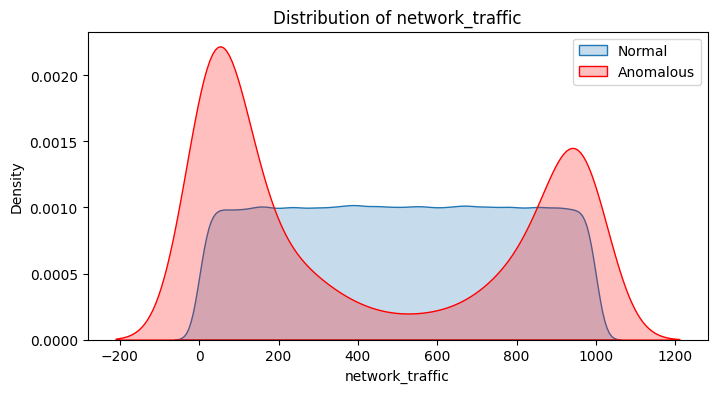

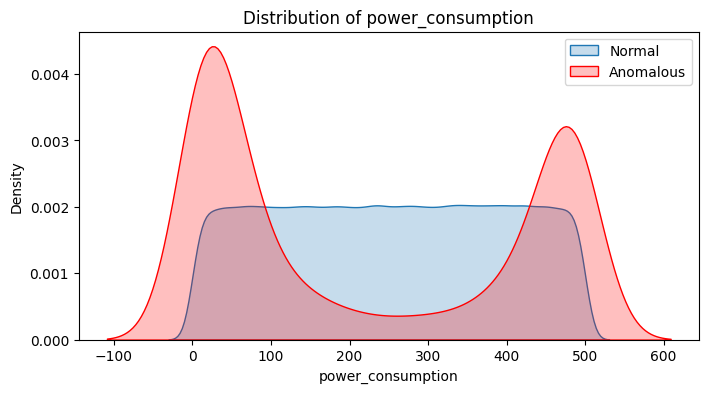

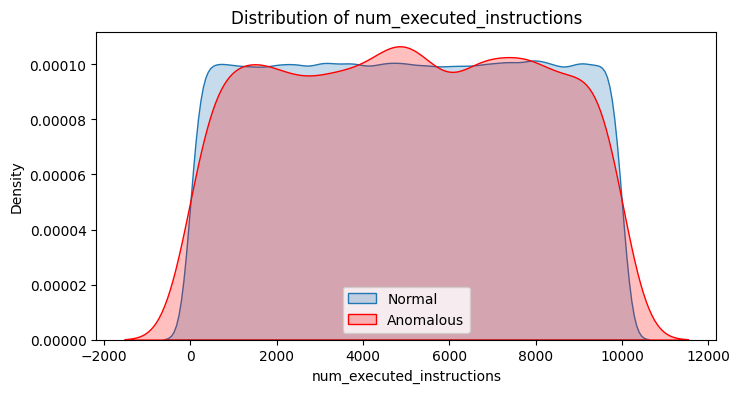

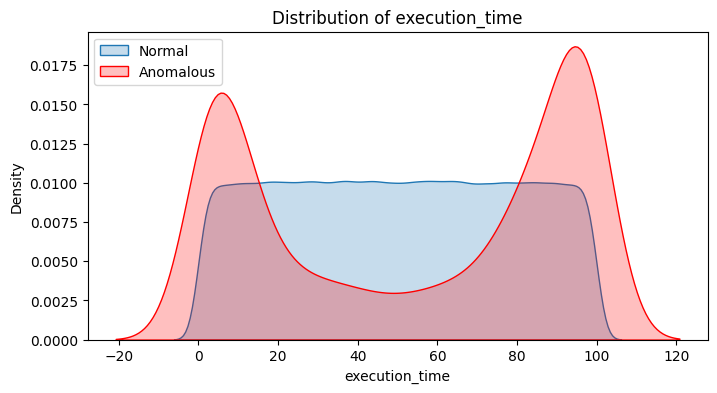

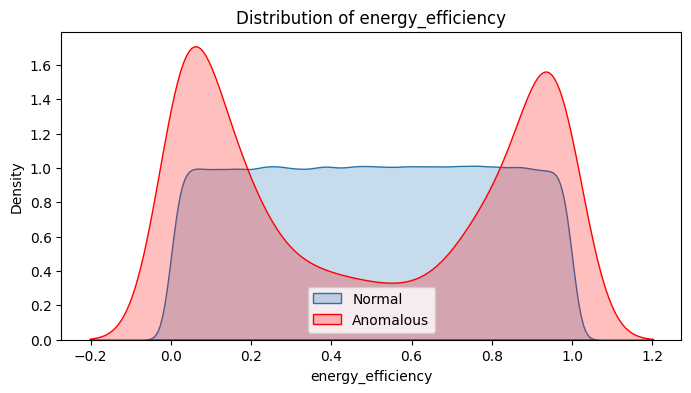

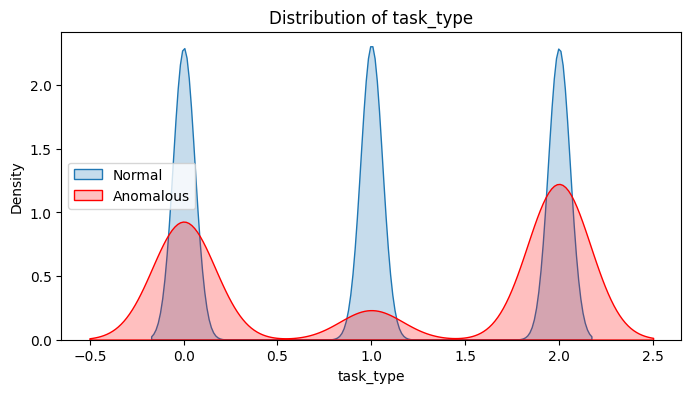

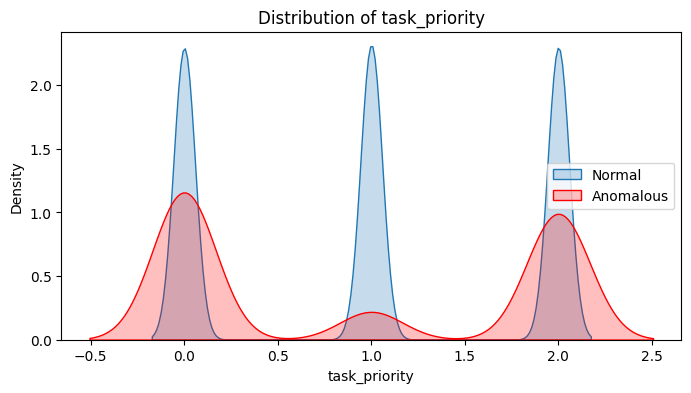

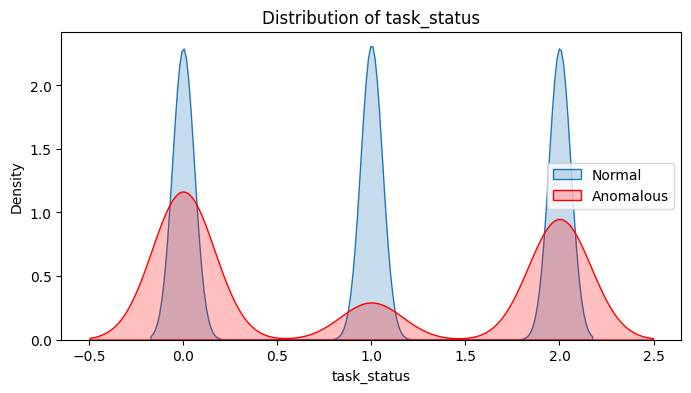

In [ ]:
# Visualize the following features to compare normal vs anormal data
features = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
       'num_executed_instructions', 'execution_time', 'energy_efficiency',
       'task_type', 'task_priority', 'task_status']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_normal[feature], label="Normal", fill=True)
    sns.kdeplot(df_anomalies[feature], label="Anomalous", fill=True, color="red")
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()

In [189]:
len(df_anomalies[df_anomalies.energy_efficiency < 0.4])

2758

In [190]:
len(df_normal[df_normal.energy_efficiency < 0.4])

222763

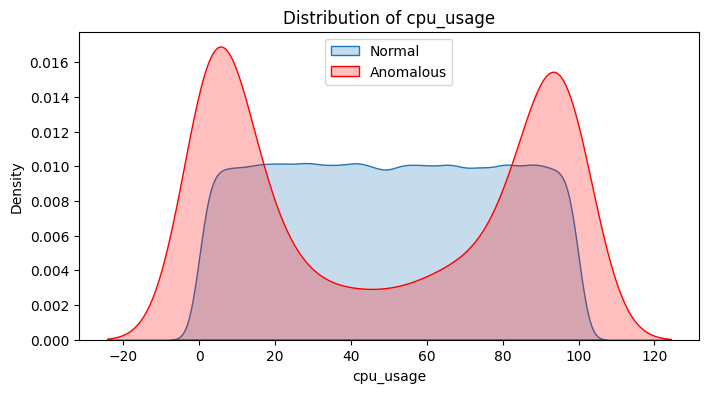

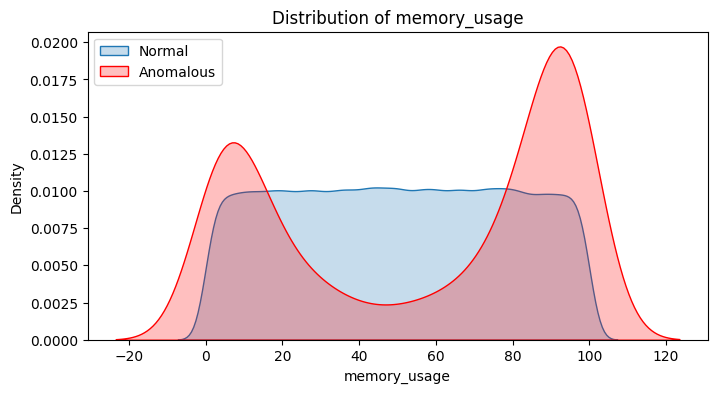

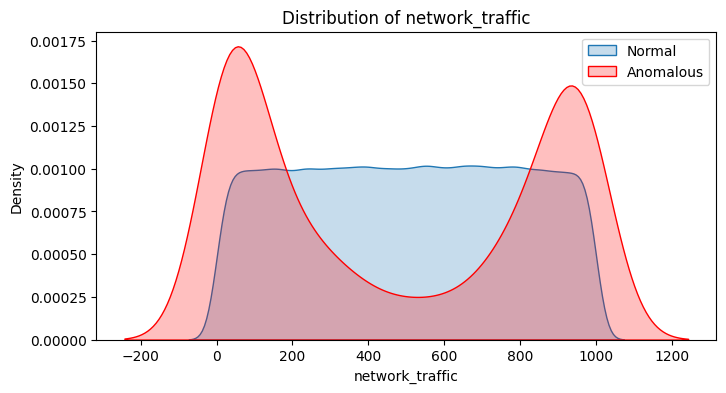

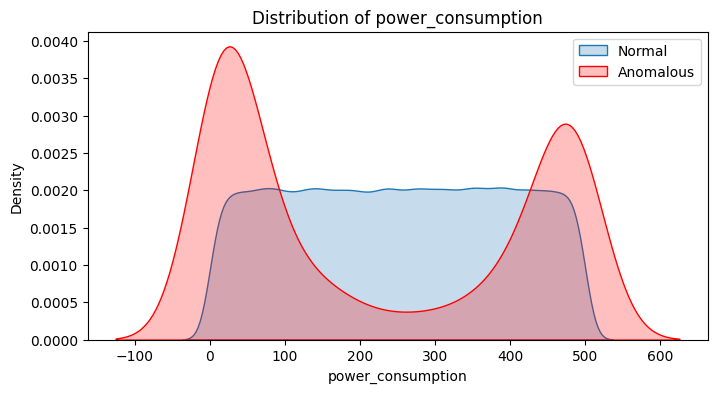

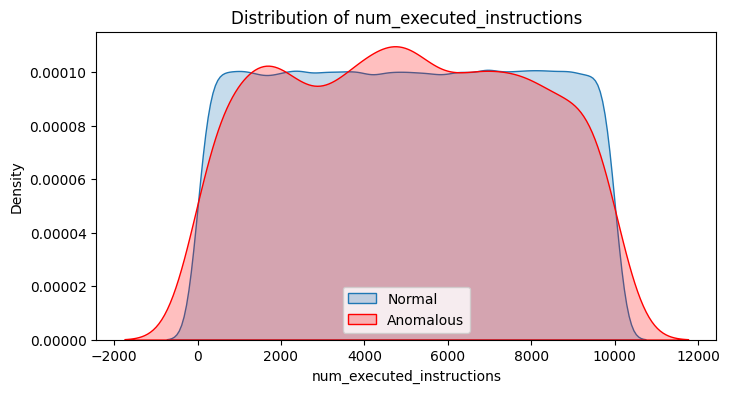

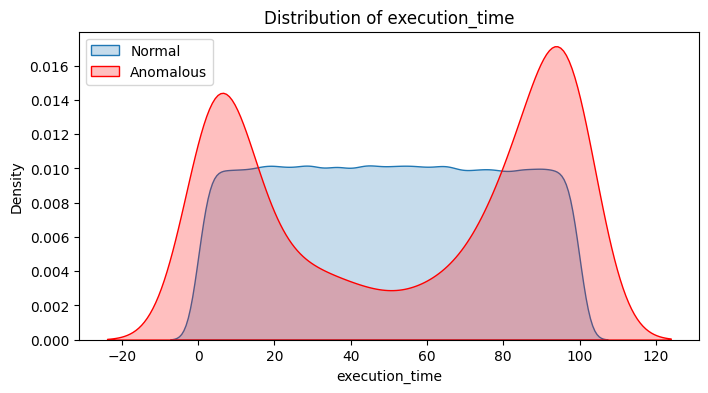

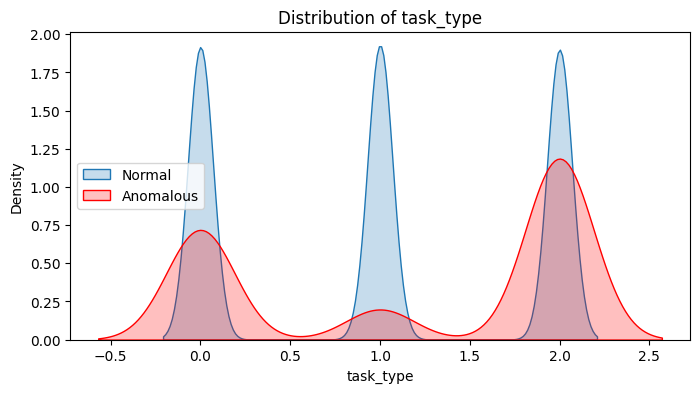

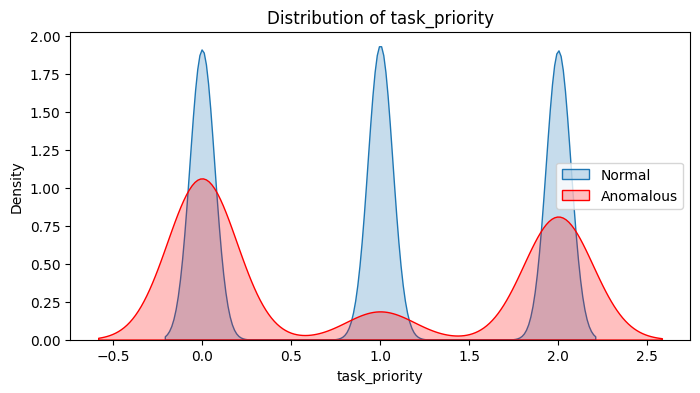

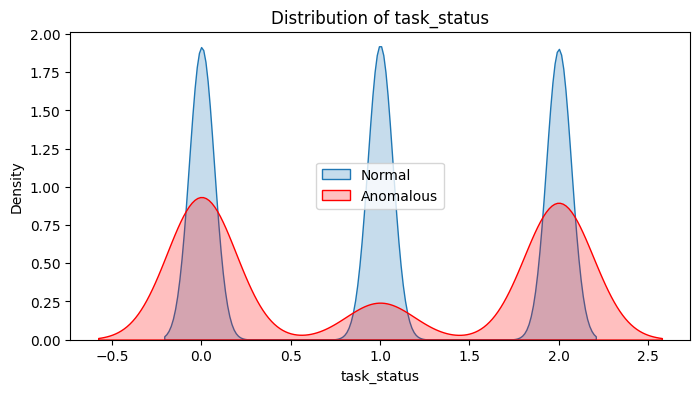

In [ ]:
# Visualize normal vs anormal data for VMs with low energy efficiency (below 0.4)
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_normal[df_normal.energy_efficiency < 0.4][feature], label="Normal", fill=True)
    sns.kdeplot(df_anomalies[df_anomalies.energy_efficiency < 0.4][feature], label="Anomalous", fill=True, color="red")
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()

In [192]:
low_efficiency = data[data["energy_efficiency"] < 0.4]
low_efficiency_normal = low_efficiency[low_efficiency["anomaly"] == 1]
low_efficiency_anomalous = low_efficiency[low_efficiency["anomaly"] == -1]

In [194]:
# low CPU usage, network traffic and memory usage and power consumption
low_efficiency_anomalous[(low_efficiency_anomalous.cpu_usage < 10) &
                         (low_efficiency_anomalous['memory_usage'] < 10) &
                         (low_efficiency_anomalous.network_traffic < 30) & 
                         (low_efficiency_anomalous.power_consumption < 20)
                         ]

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,anomaly
39653,f3f10301-ac53-484c-a4f7-206448d130ed,2023-04-28 07:49:07,7.670230,2.516341,6.576355,17.121631,2411.0,5.168761,0.131011,0,0,0,-1
1077033,c535dd01-07ff-41b7-9234-33801cb63f21,2023-04-29 23:03:36,4.375984,2.714856,25.549375,14.207099,3452.0,12.657791,0.112954,1,2,1,-1
1262337,e85d7684-4b39-4c88-b8f5-7c96d38816d9,2023-02-25 23:50:08,0.245108,4.771061,6.794394,11.885021,4066.0,0.460784,0.128956,2,1,2,-1
1400296,84f9e5c2-5364-4d94-a389-e8941fbbabf4,2023-04-18 10:43:00,0.391944,8.006971,7.873605,17.449689,1735.0,6.279464,0.125872,1,1,2,-1


In [ ]:
# Low CPU usage, low network traffic and low power consumption but high memory usage
low_efficiency_anomalous[(low_efficiency_anomalous.cpu_usage < 10) &
                         (low_efficiency_anomalous['memory_usage'] < 10) &
                         (low_efficiency_anomalous.network_traffic > 950) & 
                         (low_efficiency_anomalous.power_consumption < 20)
                         ]

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,anomaly
1678499,078a4c20-f2ad-47de-9110-113d4632279c,2023-04-29 21:01:07,1.087862,5.508378,987.962278,1.242742,1057.0,6.800084,0.167576,1,1,0,-1


In [ ]:
# Low CPU usage, low network traffic and low power consumption but high memory usage
low_efficiency_anomalous[(low_efficiency_anomalous.cpu_usage < 10) &
                         (low_efficiency_anomalous['memory_usage'] > 90) &
                         (low_efficiency_anomalous.network_traffic < 30) & 
                         (low_efficiency_anomalous.power_consumption < 20)
                         ]

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,anomaly
5489,9fdd531c-de81-4d4e-892e-9f643e4b5778,2023-05-05 23:18:43,5.040509,96.843487,10.710881,9.075024,1447.0,9.253647,0.015400,1,2,1,-1
980157,7f44c1a2-71fe-4161-a2c2-a72bcfc1dfd9,2023-02-11 20:36:45,1.459017,91.319361,25.385694,11.244428,327.0,66.922769,0.248920,0,0,2,-1
1857644,7225fe7f-3670-41f7-9f11-8ae651a9439f,2023-01-09 04:27:32,1.371504,95.646308,23.194063,6.897034,9140.0,32.277951,0.048189,0,2,0,-1


In [ ]:
# Low memory usage, low network traffic and low power consumption but high CPU usage
low_efficiency_anomalous[(low_efficiency_anomalous.cpu_usage > 90) &
                         (low_efficiency_anomalous['memory_usage'] < 10) &
                         (low_efficiency_anomalous.network_traffic < 30) & 
                         (low_efficiency_anomalous.power_consumption < 20)
                         ]

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,anomaly
1286191,6c967f82-f046-4df9-9e88-d4bee1a48cd0,2023-02-21 23:14:39,93.299375,4.894729,17.973404,18.033390,9498.0,14.484596,0.032298,0,1,0,-1
1666212,7110737e-f437-4f7c-b81a-f659818b1836,2023-03-10 08:08:25,98.209019,4.745662,20.474204,12.571342,1989.0,93.578003,0.308676,1,2,0,-1
1762070,846d0e14-1ec6-495e-baeb-4d5f017dcfdc,2023-03-09 21:36:45,92.747651,8.307533,4.895818,14.827456,808.0,99.683780,0.074289,0,2,1,-1
1812787,0d99d0ad-3156-49c1-874b-4dfb2a6b0477,2023-01-23 22:26:30,91.435627,6.127669,9.988410,9.799099,3624.0,71.267423,0.196097,0,0,2,-1
